# CI7340 Applied Data Programming

# Conducting the IDA(Initial Data Analysis)  on the dataset


# #Importing Libraries and loading Data

In [ ]:
#importing neccesasry libraries and loading of dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
#loading of the Data
Data=pd.read_csv(r'C:\Users\Amylicious\support2-1.csv', low_memory=False)

# Initial Data Examination/Exploration

In [ ]:
#View the first 5 rows of the database
Data.head()

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [ ]:
#checking the shape of the dataset
Data.shape

(9105, 48)

In [ ]:
#checking the information of the dataset which include count of non values and datatype
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

In [ ]:
#checking for missing value
Data.isna().sum()

ID             0
age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
sfdm2       1400
adlsc          0
dtype: int64

In [ ]:
#Data summary statistics
Data.describe()

,ID,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,4553.000000,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,2628.531434,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,1.000000,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2277.000000,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,4553.000000,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,6829.000000,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,9105.000000,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [ ]:
#checking for duplicate in the dataset
Data.duplicated().sum()

0

In [ ]:
#obtaining the value count for all column/features in the dataset i.e Data Integrity
for col in Data.columns:
    value_counts=Data[col].value_counts()
    print(f"Value counts for column '{col}':")
    print(value_counts)

Value counts for column 'ID':
2049    1
6758    1
605     1
6750    1
4703    1
       ..
5376    1
3323    1
1274    1
7417    1
2047    1
Name: ID, Length: 9105, dtype: int64
Value counts for column 'age':
71.99695    5
68.20294    4
58.79300    4
59.31000    4
68.64099    4
           ..
86.70197    1
64.52795    1
66.61694    1
79.53998    1
22.20399    1
Name: age, Length: 7323, dtype: int64
Value counts for column 'death':
1    6201
0    2904
Name: death, dtype: int64
Value counts for column 'sex':
male      5125
female    3980
Name: sex, dtype: int64
Value counts for column 'hospdead':
0    6745
1    2360
Name: hospdead, dtype: int64
Value counts for column 'slos':
5      688
4      656
7      643
6      632
9      500
      ... 
149      1
189      1
213      1
245      1
343      1
Name: slos, Length: 167, dtype: int64
Value counts for column 'd.time':
4       238
5       194
7       180
6       155
8       144
       ... 
1713      1
734       1
876       1
884       1
1842  

In [ ]:
#unique value
Data.nunique()

ID          9105
age         7323
death          2
sex            2
hospdead       2
slos         167
d.time      1724
dzgroup        8
dzclass        4
num.co        10
edu           31
income         4
scoma         11
charges     8501
totcst      8197
totmcst     5516
avtisst      352
race           5
sps          604
aps          125
surv2m       949
surv6m       936
hday          85
diabetes       2
dementia       2
ca             3
prg2m         51
prg6m         87
dnr            3
dnrday       177
meanbp       164
wblc         499
hrt          186
resp          66
temp          98
pafi        1457
alb           60
bili         295
crea         130
sod           60
ph            77
glucose      439
bun          159
urine       1494
adlp           8
adls           8
sfdm2          5
adlsc       1735
dtype: int64

Numerical Vs Categorical Variables

In [ ]:
#Differentiating between Numerical and Categorical  Variables
data = Data.dtypes
numerical_vars = data[data != 'object'].index
categorical_vars = data[data == 'object'].index

print("Numerical Variables:")
print(numerical_vars)

print("\nCategorical Variables:")
print(categorical_vars)

Numerical Variables:
Index(['ID', 'age', 'death', 'hospdead', 'slos', 'd.time', 'num.co', 'edu',
       'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'prg2m', 'prg6m',
       'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
       'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls',
       'adlsc'],
      dtype='object')

Categorical Variables:
Index(['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'sfdm2'], dtype='object')


# Exploratory Data Analysis

Summary Statistic

In [ ]:
def data_summary(Data):[io]
    summary={
        'Data Types':Data.dtypes,
        'Number of Rows':len(Data),
        'Number of Columns':len(Data.columns),
        'Missing Values':Data.isnull().sum(),
        'Unique Values':Data.nunique()
    }
    return pd.DataFrame(summary)
summary_insights=data_summary(Data)
print(summary_insights)

         Data Types  Number of Rows  Number of Columns  Missing Values  \
ID            int64            9105                 48               0   
age         float64            9105                 48               0   
death         int64            9105                 48               0   
sex          object            9105                 48               0   
hospdead      int64            9105                 48               0   
slos          int64            9105                 48               0   
d.time        int64            9105                 48               0   
dzgroup      object            9105                 48               0   
dzclass      object            9105                 48               0   
num.co        int64            9105                 48               0   
edu         float64            9105                 48            1634   
income       object            9105                 48            2982   
scoma       float64            9105   

Handling missing values

In [ ]:
#Delete row of column with low percentage of missing values
column_lp=['dnr','dnrday','meanbp','wblc','hrt','resp','temp','crea','sod','avtisst','race','edu','sps','surv2m', 'surv6m', 'income']
Data=Data.dropna(subset=column_lp)

In [ ]:
#from the value count and also understanding of the nature of the dataset, edu(level of education)is considered as a categorical variable so the datatype needs to be changed from int to object
Data['edu']=Data['edu'].astype(str)

Visualization of the Data distribution and also showing the outlier

In [ ]:
# Using IQR to detect outliers for numerical columns
numerical_cols = Data.select_dtypes(include=[np.number]).columns.tolist()
outliers = {}
for col in tqdm(numerical_cols):
    Q1 = Data[col].quantile(0.25)
    Q3 = Data[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = ((Data[col] < (Q1 - 1.5 * IQR)) | (Data[col] > (Q3 + 1.5 * IQR)))
    outliers[col] = Data[outlier_condition].shape[0]
    outliers[col]

  0%|          | 0/39 [00:00<?, ?it/s]

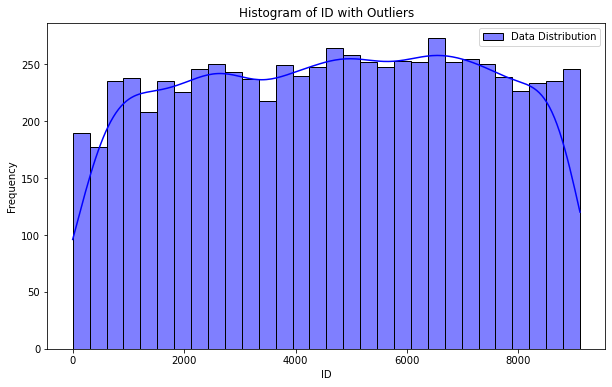

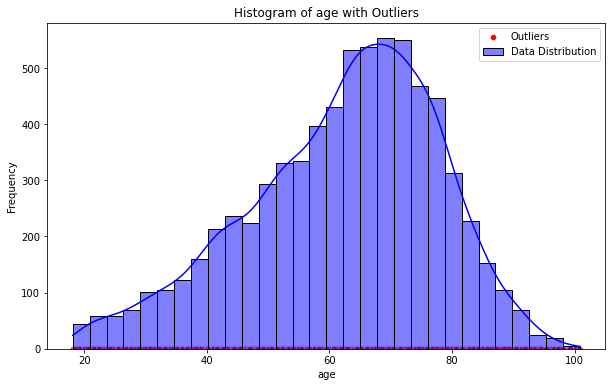

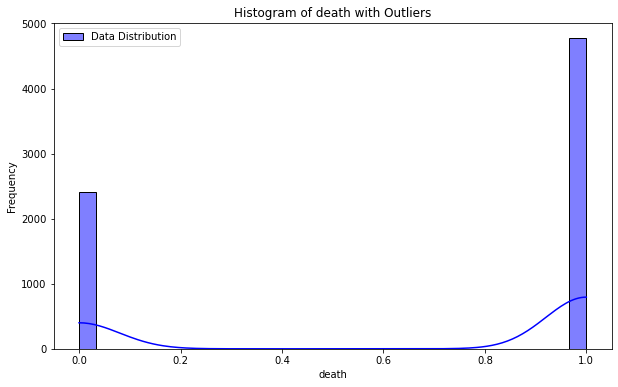

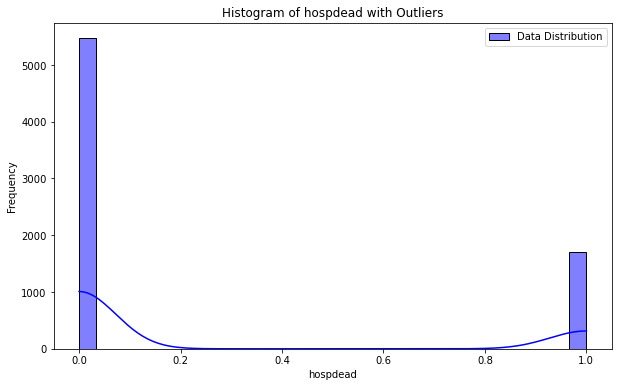

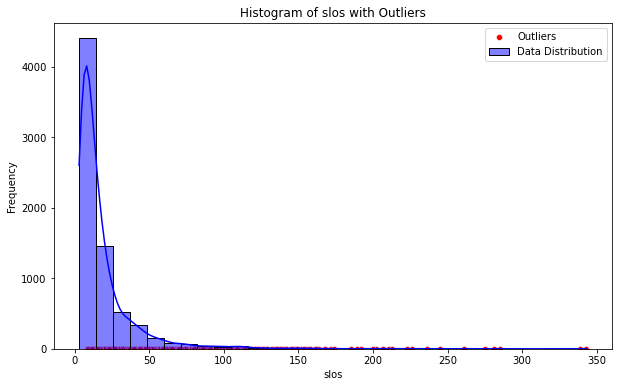

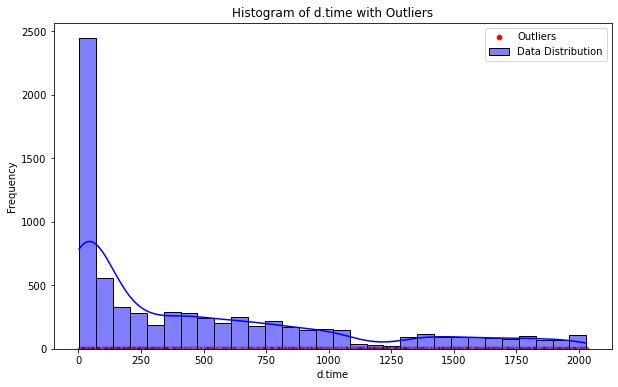

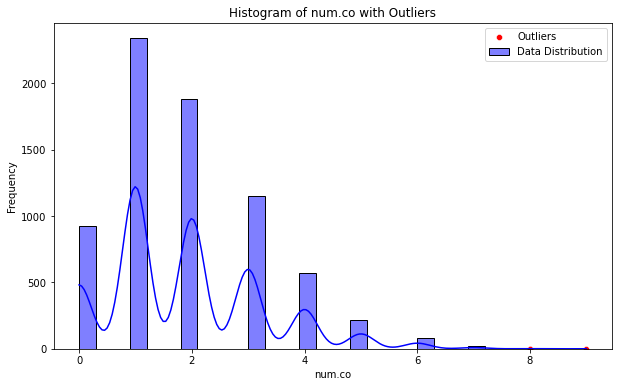

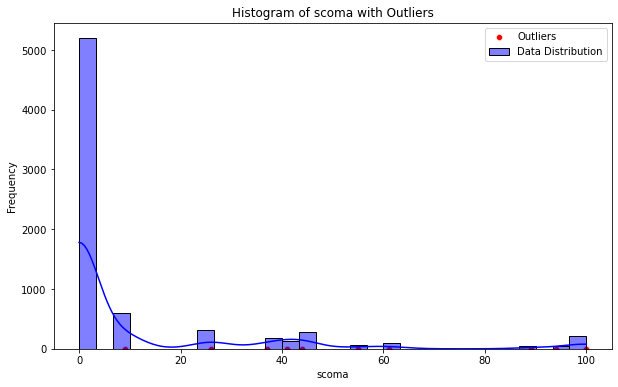

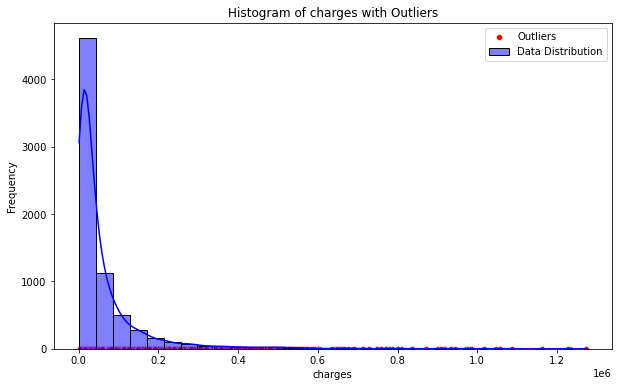

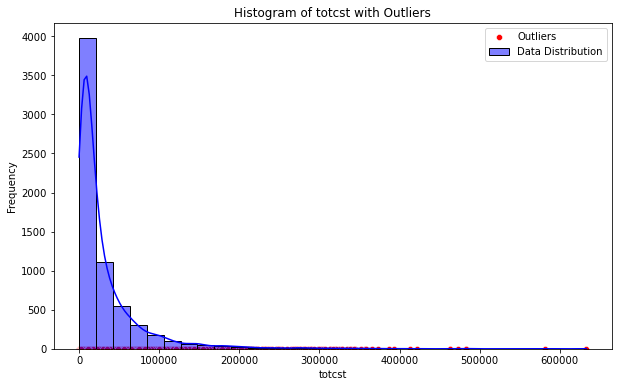

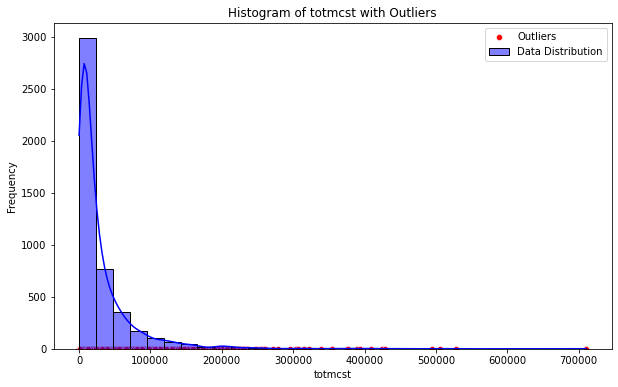

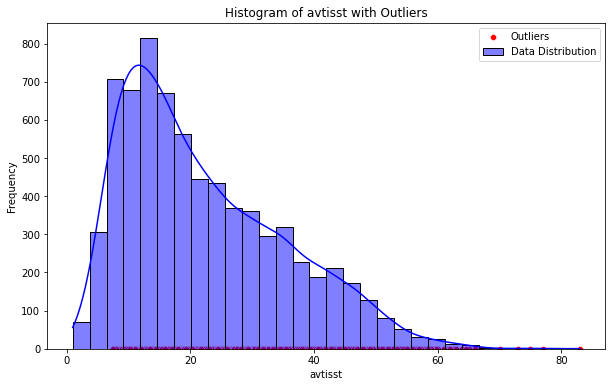

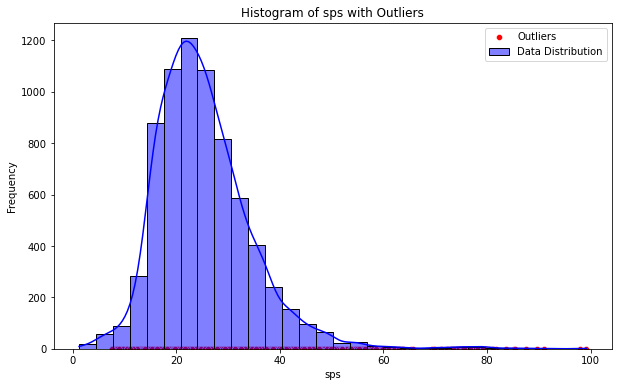

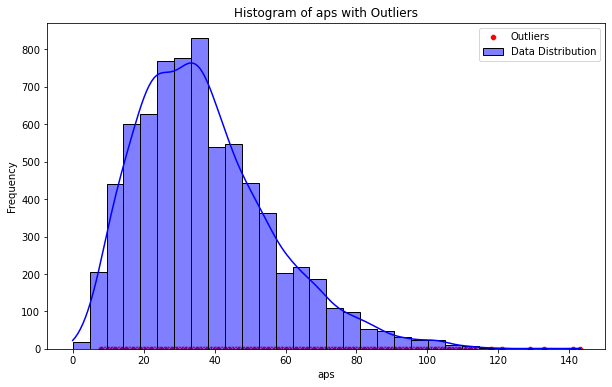

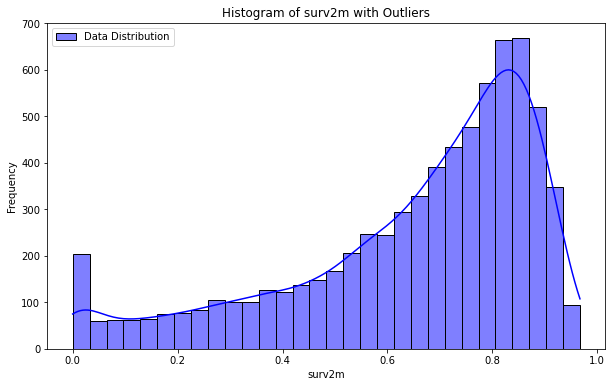

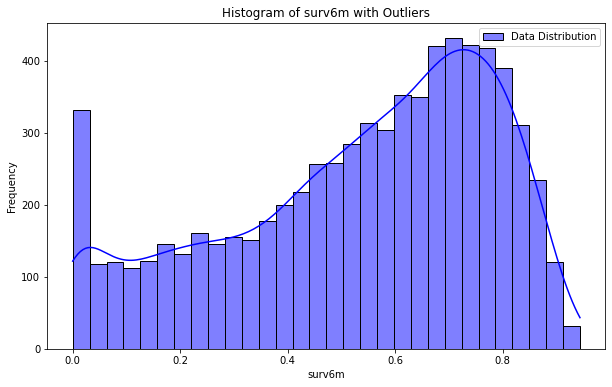

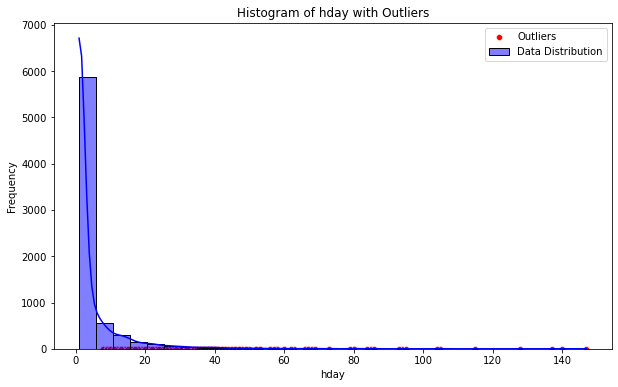

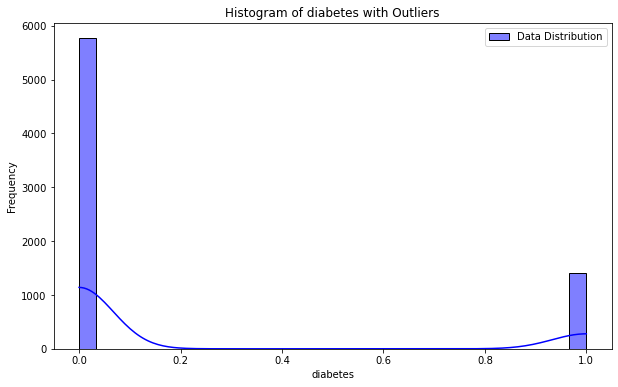

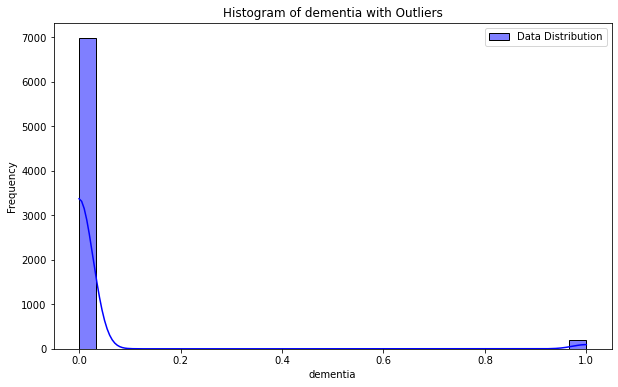

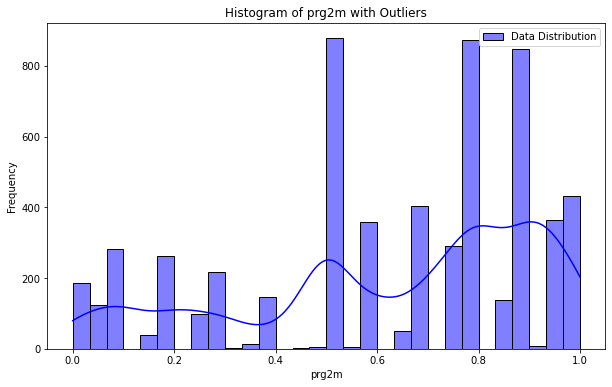

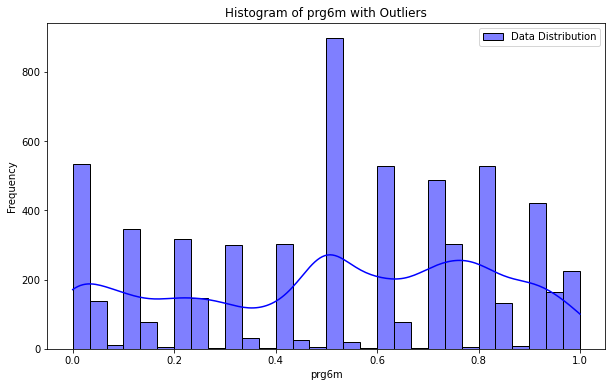

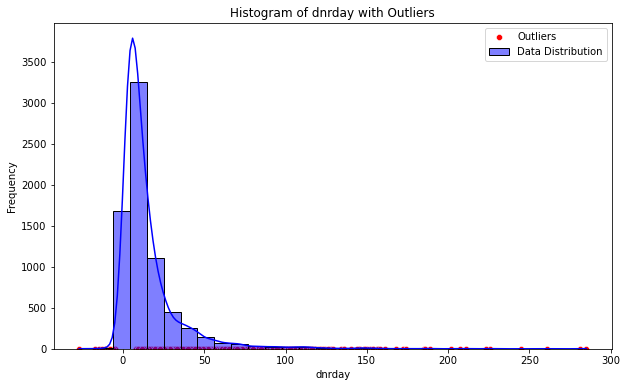

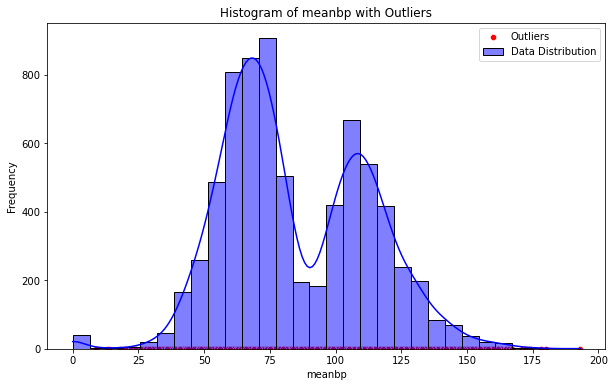

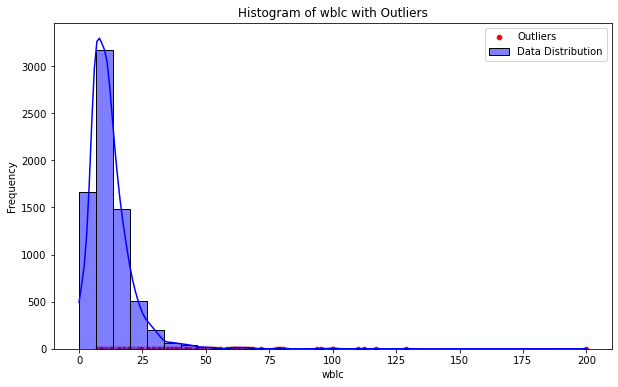

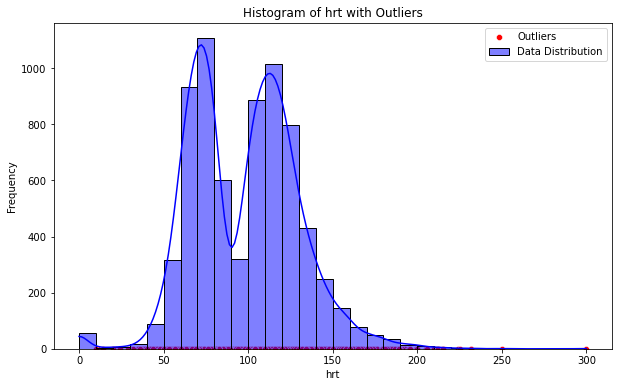

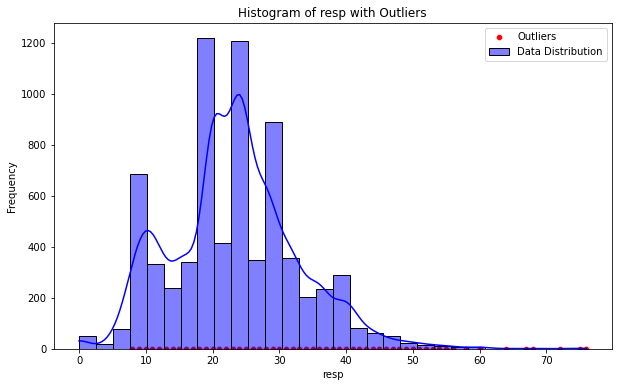

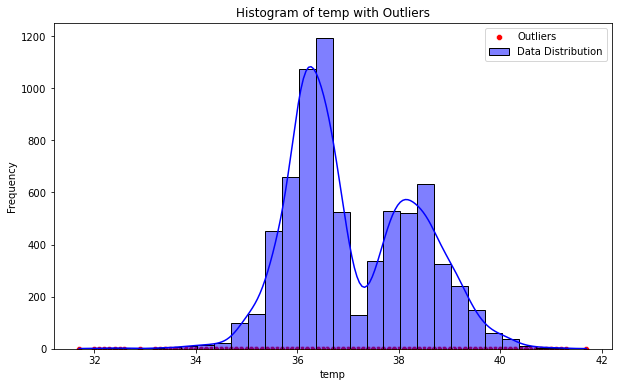

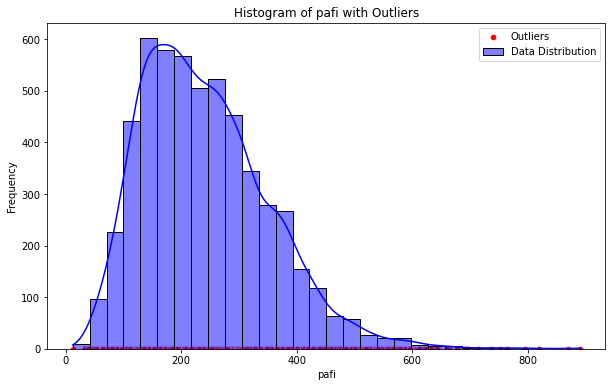

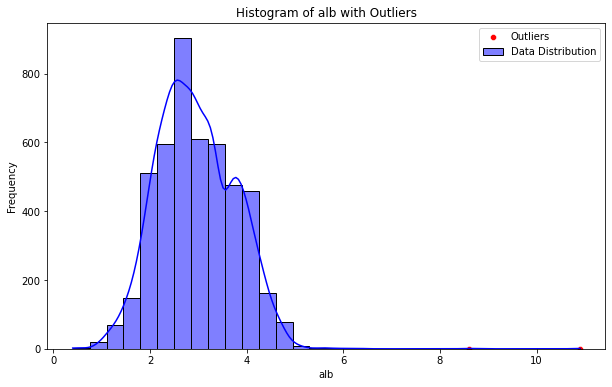

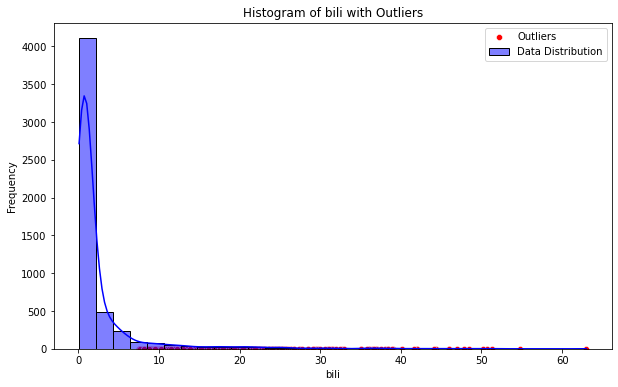

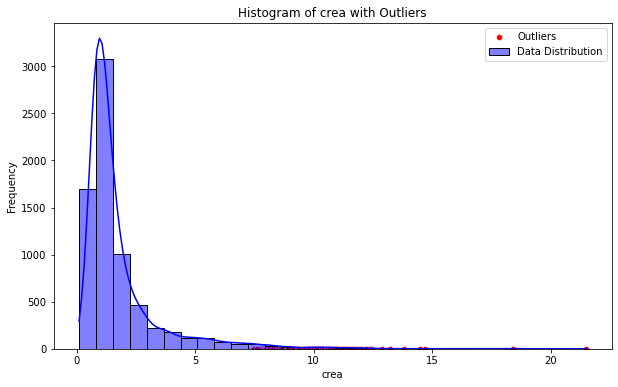

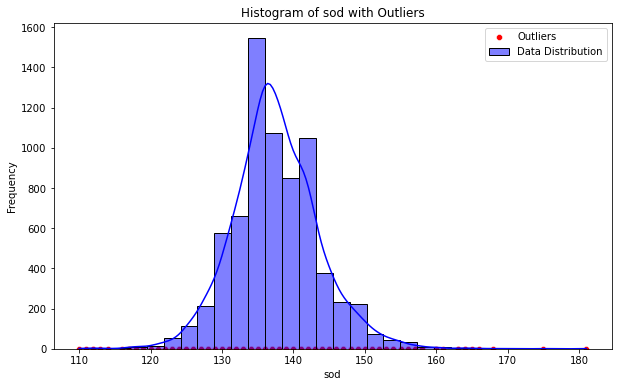

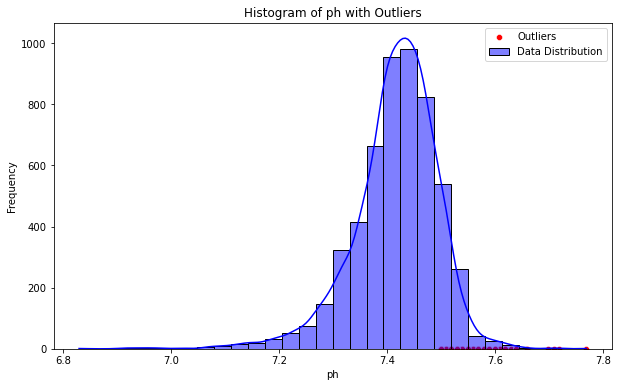

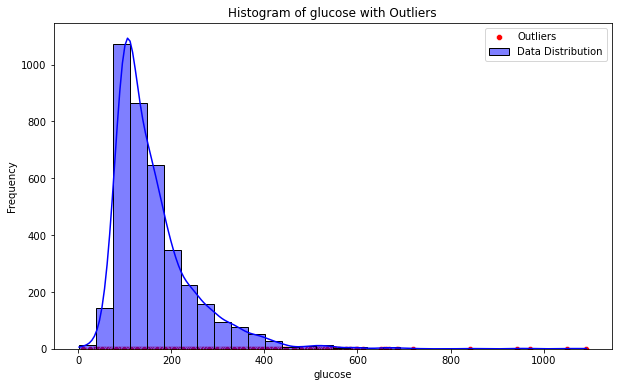

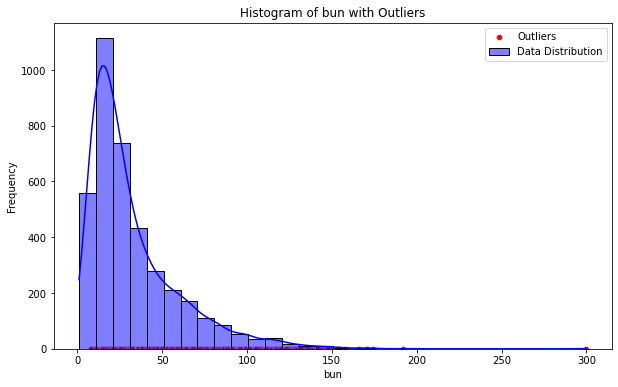

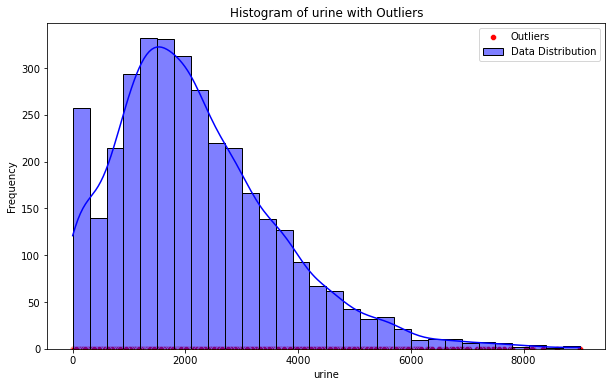

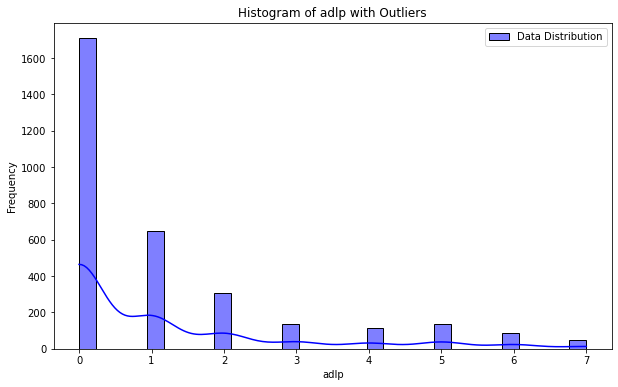

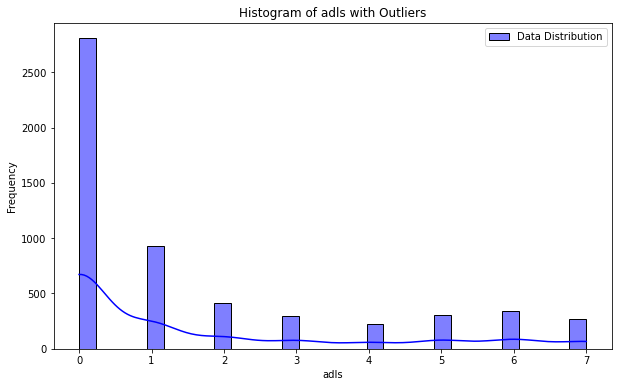

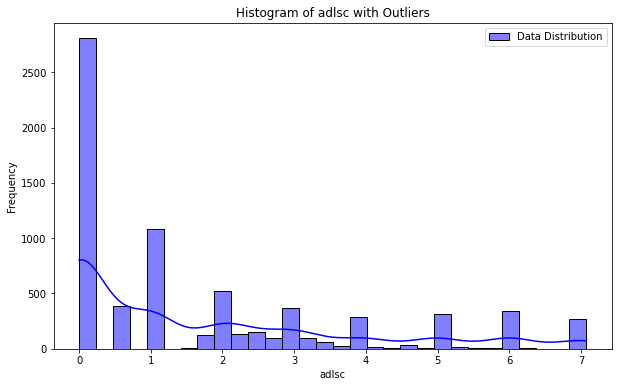

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    # Plotting the histogram
    sns.histplot(Data[col], bins=30, kde=True, color='blue', label='Data Distribution')
    # Highlighting outliers
    if outliers[col] > 0:
        outlier_data = Data[(Data[col] < (Q1 - 1.5 * IQR)) | (Data[col] > (Q3 + 1.5 * IQR))]
        sns.scatterplot(x=outlier_data[col], y=np.zeros_like(outlier_data[col]), color='red', marker='o', label='Outliers')
    # Adding labels and title
    plt.title(f'Histogram of {col} with Outliers')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    # Show the plot
    plt.show()

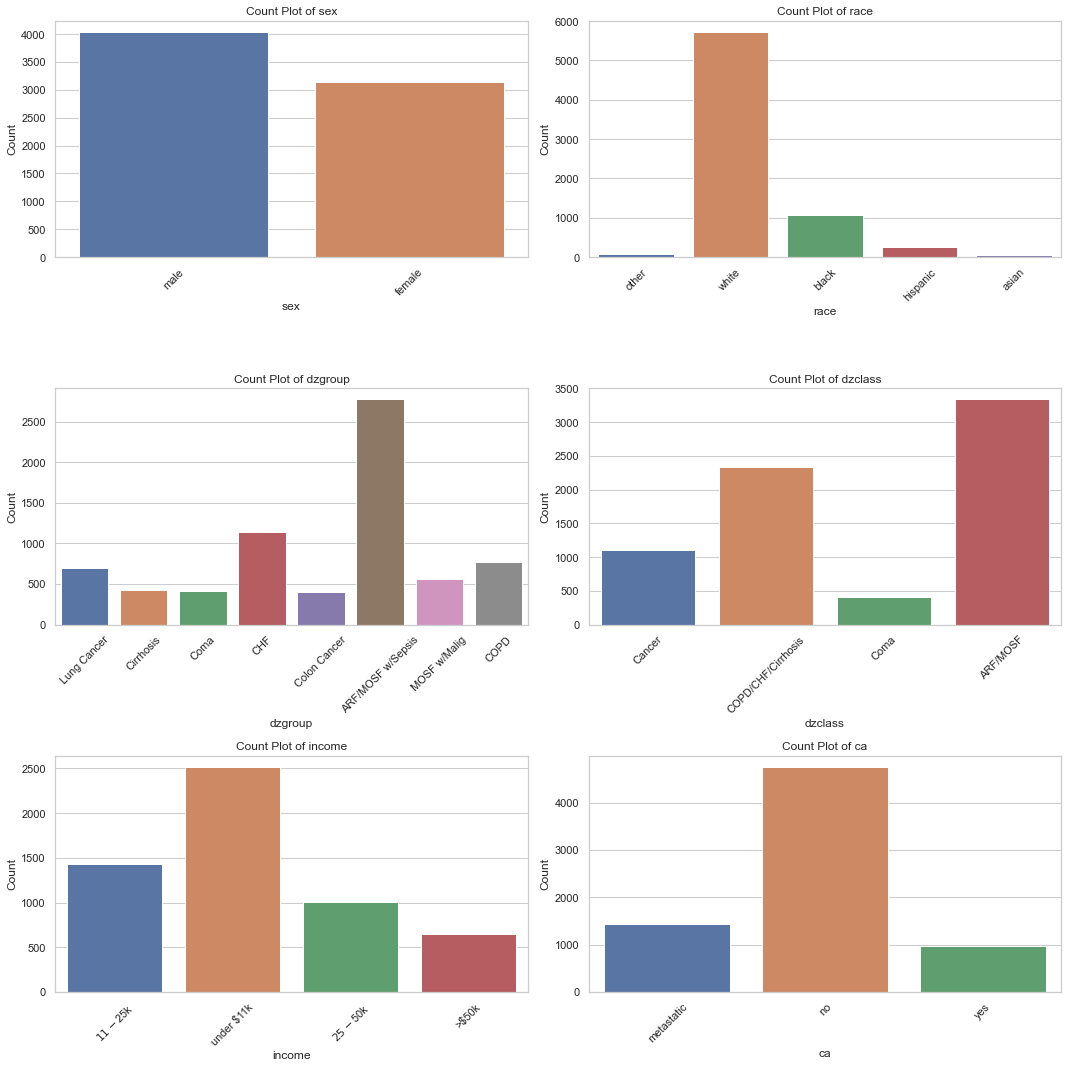

In [ ]:
#visualization of the categorical variables
# Set the style for seaborn
sns.set(style='whitegrid')

# Create a figure with subplots for categorical variables
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# List of categorical columns to plot
categorical_columns = ['sex', 'race', 'dzgroup', 'dzclass', 'income', 'ca']

# Plot count plots for categorical columns
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=Data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title('Count Plot of ' + col)
    axes[i//2, i%2].set_ylabel('Count')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

Explore Relationship

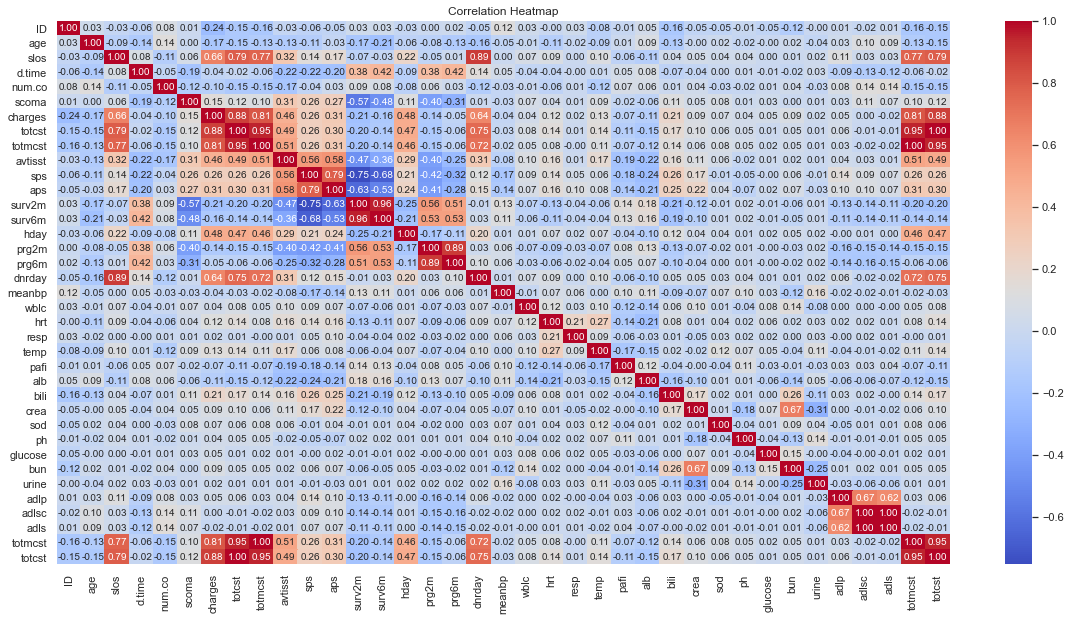

In [ ]:
# Exploring the relationship between numerical variables
Numerical_variable=['ID', 'age', 'slos', 'd.time', 'num.co','scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday',  'prg2m', 'prg6m','dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb','bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp',
       'adlsc','adls','totmcst','totcst']
numerical_Data=Data[Numerical_variable]
#correlation between numerical variables
correlation_matrix = numerical_Data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

# Futher Visualization

 Here are the scatter plots visualizing the relationship between the Support Prognostic Score (SPS) and survival rates at 2 and 6 months, categorized by disease group:

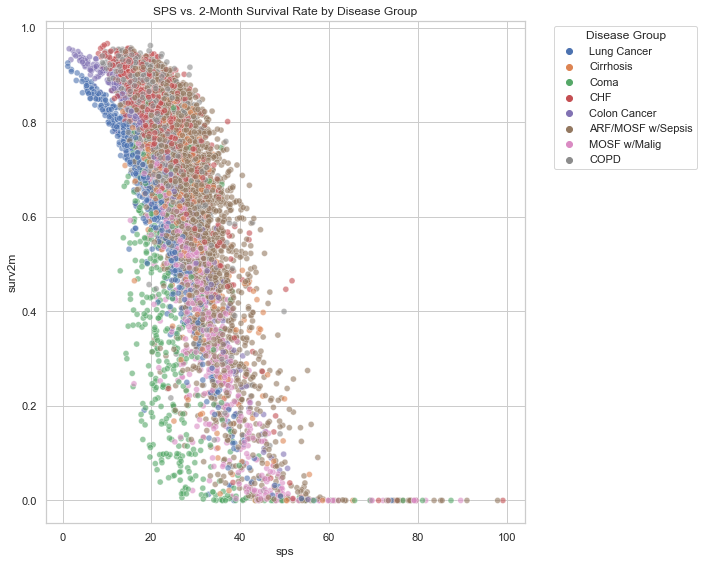

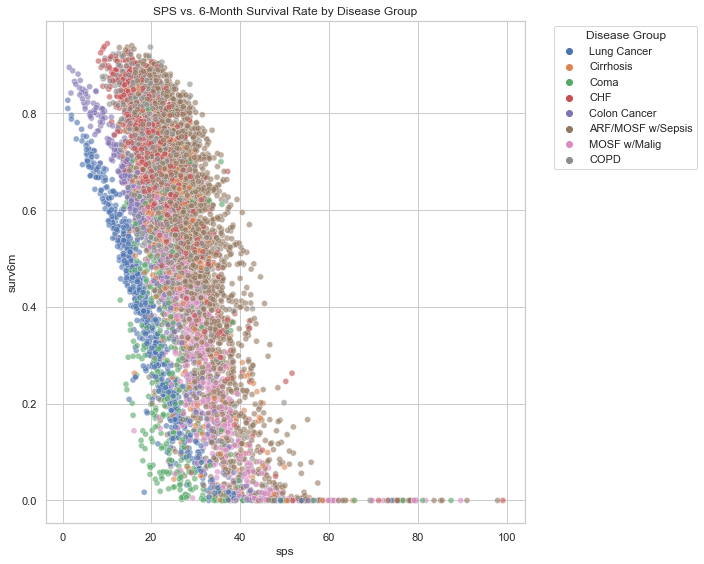

In [ ]:
# Scatter plot for SPS vs. 2-month survival rate
plt.figure(figsize=(10, 8))
g1 = sns.scatterplot(data=Data, x='sps', y='surv2m', hue='dzgroup', alpha=0.6)
plt.title('SPS vs. 2-Month Survival Rate by Disease Group')
plt.legend(title='Disease Group', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()
#Scatter plot for SPS vs. 6-month survival rate
plt.figure(figsize=(10, 8))
g2 = sns.scatterplot(data=Data, x='sps', y='surv6m', hue='dzgroup', alpha=0.6)
plt.title('SPS vs. 6-Month Survival Rate by Disease Group')
plt.legend(title='Disease Group', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

Here is a Box plot to understand the variation of SPS among all Disease group, which may be be indicate of varying prognoses

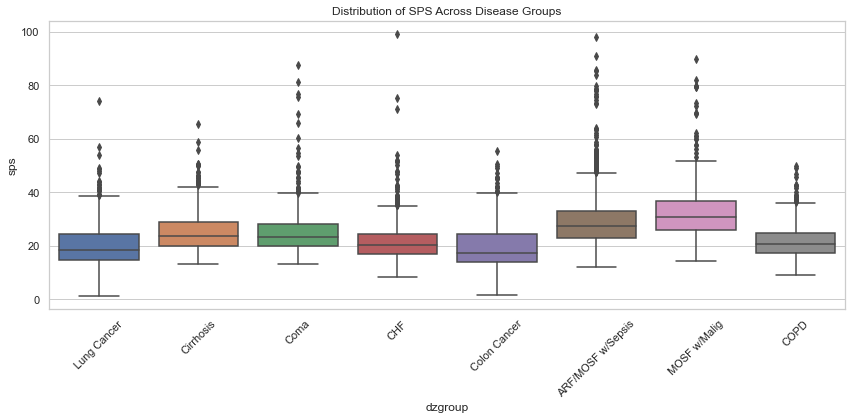

Descriptive Statistics for SPS:
 count    7178.000000
mean       25.301480
std         9.388475
min         1.199951
25%        19.097656
50%        24.000000
75%        29.898438
max        99.187500
Name: sps, dtype: float64

Descriptive Statistics for 2-Month Survival Rate:
 count    7178.000000
mean        0.648967
std         0.238677
min         0.000000
25%         0.533936
50%         0.723999
75%         0.829956
max         0.966919
Name: surv2m, dtype: float64

Descriptive Statistics for 6-Month Survival Rate:
 count    7178.000000
mean        0.532586
std         0.248178
min         0.000000
25%         0.364990
50%         0.585938
75%         0.733643
max         0.943970
Name: surv6m, dtype: float64

Correlation between SPS and 2-Month Survival Rate: -0.75
Correlation between SPS and 6-Month Survival Rate: -0.68


In [ ]:
# Generate boxplots for SPS distribution across different disease groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=Data, x='dzgroup', y='sps')
plt.title('Distribution of SPS Across Disease Groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate descriptive statistics for SPS, survival rates at 2 and 6 months
sps_stats = Data['sps'].describe()
surv2m_stats = Data['surv2m'].describe()
surv6m_stats = Data['surv6m'].describe()

# Calculate correlation between SPS and survival rates
sps_surv2m_corr = Data[['sps', 'surv2m']].corr().iloc[0,1]
sps_surv6m_corr = Data[['sps', 'surv6m']].corr().iloc[0,1]

print('Descriptive Statistics for SPS:\n', sps_stats)
print('\nDescriptive Statistics for 2-Month Survival Rate:\n', surv2m_stats)
print('\nDescriptive Statistics for 6-Month Survival Rate:\n', surv6m_stats)
print('\nCorrelation between SPS and 2-Month Survival Rate: {:.2f}'.format(sps_surv2m_corr))
print('Correlation between SPS and 6-Month Survival Rate: {:.2f}'.format(sps_surv6m_corr))

Here is a barplot showing the distribution of grouped disease based on age and race of all patient

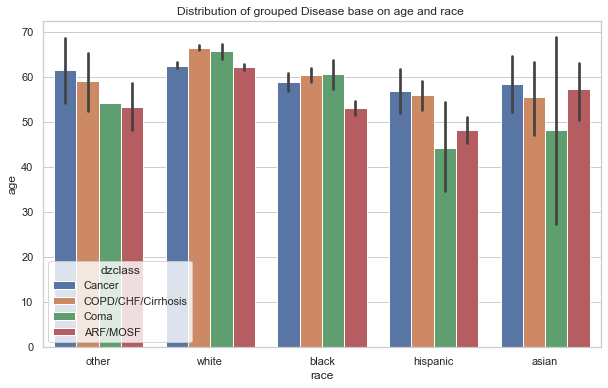

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=Data,x='race',y='age',hue='dzclass')
plt.xlabel('race')
plt.ylabel('age')
plt.title('Distribution of grouped Disease base on age and race ')
plt.show()

Here is a countplot to show the distribution of patient that died in hospital based DNR(Do not Rescuscitate order)

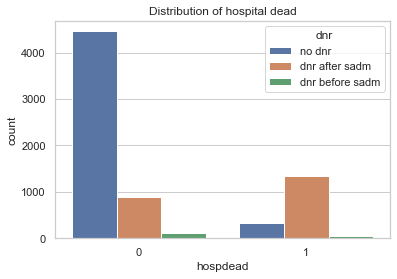

In [ ]:
#Distribution of Hospital dead base on Do not rescuscitate (DNR) order
plt.figure(figsize=(6, 4))
sns.countplot(x='hospdead',data=Data, hue='dnr')
plt.title('Distribution of hospital dead')
plt.show()

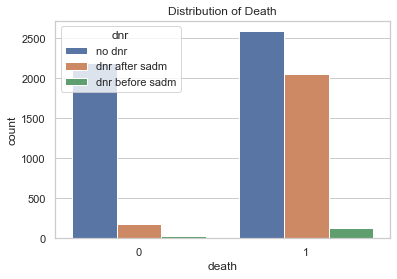

In [ ]:
#Distribution of Death after discharged from the hospital base on DNR
plt.figure(figsize=(6, 4))
sns.countplot(x='death', data=Data,hue='dnr')
plt.title('Distribution of Death')
plt.show()

Here is a barplot that shows the relationship between number of comorbidities and income

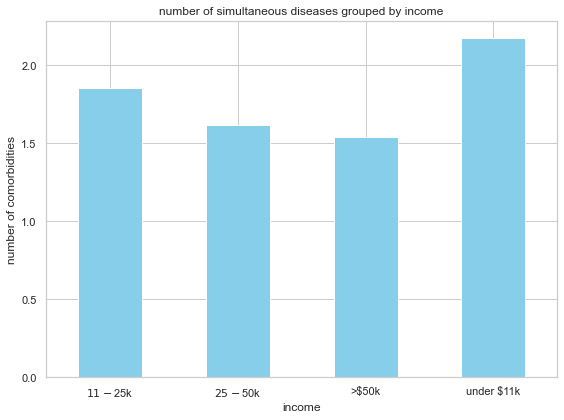

In [ ]:
# Distribution of number of comorbidities base on income
mean_values = Data.groupby('income')['num.co'].mean()

# Plotting a bar chart
plt.figure(figsize=(8, 6))
mean_values.plot(kind='bar', color='skyblue')
plt.xlabel('income')
plt.ylabel('number of comorbidities')
plt.title('number of simultaneous diseases grouped by income')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

Here is a barplot of that shows the raltionship between length of stay in the hospital by grouped age patients and their survive rate at 2months and 6 months

Calculating...:   0%|          | 0/1 [00:00<?, ?it/s]

Average Length of Stay by Hospital Death Status:
hospdead
0    18.073282
1    18.985346
Name: slos, dtype: float64

Average 2-Month and 6-Month Survival Probabilities by Age Group:
             surv2m    surv6m
age_group                    
(0, 30]    0.729122  0.660464
(30, 40]   0.714543  0.634452
(40, 50]   0.681245  0.574806
(50, 60]   0.681256  0.561089
(60, 70]   0.643508  0.516800
(70, 80]   0.618779  0.494238
(80, 90]   0.580992  0.466913
(90, 100]  0.540522  0.423737


Plotting Survival Probabilities by Age Group...:   0%|          | 0/1 [00:00<?, ?it/s]

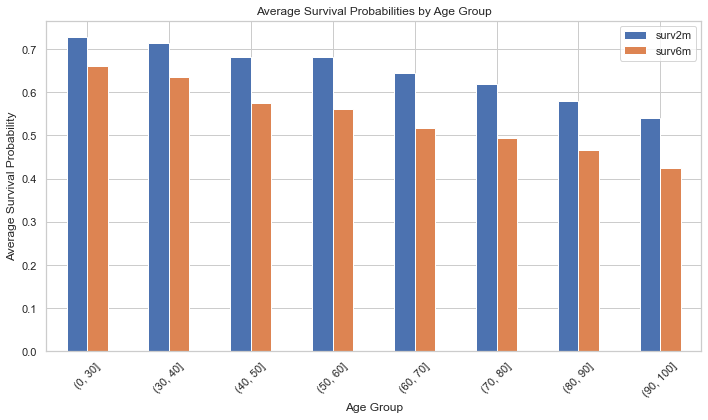

In [ ]:
# Set up the progress bar
for i in tqdm(range(1), desc='Calculating...'):
    # Calculate the average length of stay for patients who survived and those who did not
    avg_slos_survived = Data.groupby('hospdead')['slos'].mean()
    # Calculate the average survival probabilities by age group
    age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
    Data['age_group'] = pd.cut(Data['age'], bins=age_bins)
    avg_survival_by_age = Data.groupby('age_group')[['surv2m', 'surv6m']].mean()

    # Display the results
    print('Average Length of Stay by Hospital Death Status:')
    print(avg_slos_survived)
    print('\nAverage 2-Month and 6-Month Survival Probabilities by Age Group:')
    print(avg_survival_by_age)

    # Set up the progress bar
for i in tqdm(range(1), desc='Plotting Survival Probabilities by Age Group...'):
    # Plot the average survival probabilities by age group
    fig, ax = plt.subplots(figsize=(10, 6))
    avg_survival_by_age.plot(kind='bar', ax=ax)
    ax.set_title('Average Survival Probabilities by Age Group')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Average Survival Probability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Here is a visualization of the average survival rate of patient with different disease group

In [ ]:
# Group the data by disease group and calculate the average survival probabilities for each
disease_survival = Data.groupby('dzgroup')[['surv2m', 'surv6m']].mean()

# Display the average survival probabilities for each disease group
disease_survival

,surv2m,surv6m
dzgroup,,
ARF/MOSF w/Sepsis,0.631157,0.548898
CHF,0.812021,0.707059
COPD,0.774303,0.655778
Cirrhosis,0.674351,0.538604
Colon Cancer,0.744611,0.535314
Coma,0.354992,0.302670
Lung Cancer,0.629536,0.369235
MOSF w/Malig,0.385734,0.293781


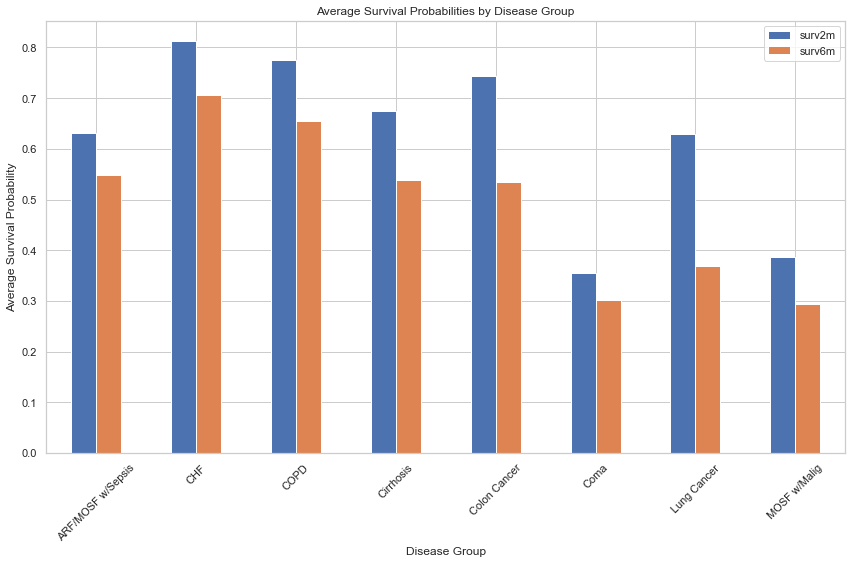

In [ ]:
# Plot the average survival probabilities by disease group
fig, ax = plt.subplots(figsize=(12, 8))
disease_survival.plot(kind='bar', ax=ax)
ax.set_title('Average Survival Probabilities by Disease Group')
ax.set_xlabel('Disease Group')
ax.set_ylabel('Average Survival Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here is a scatter plot that shows the relationship between charges and survival probabilities of patients

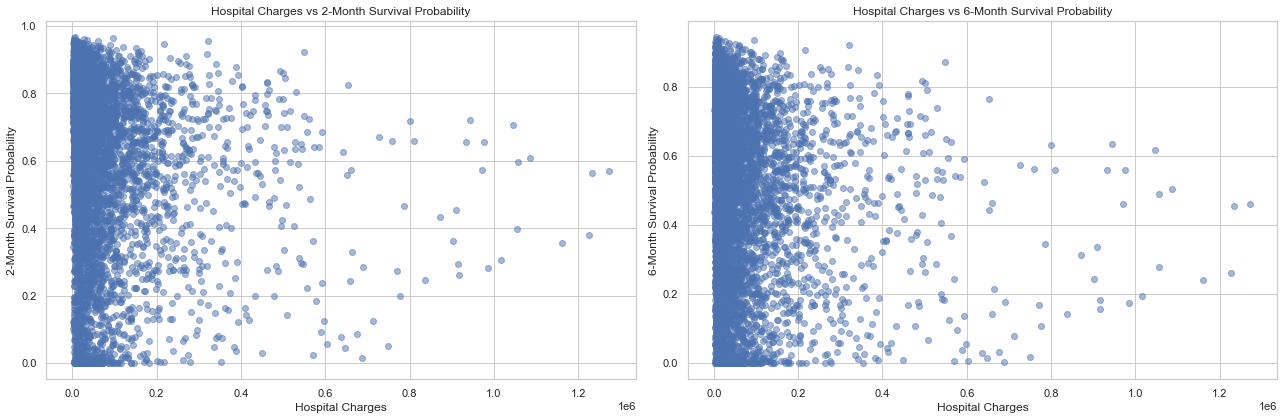

In [ ]:
# Scatter plot for charges vs survival probabilities
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot for charges vs 2-month survival probability
ax[0].scatter(Data['charges'], Data['surv2m'], alpha=0.5)
ax[0].set_title('Hospital Charges vs 2-Month Survival Probability')
ax[0].set_xlabel('Hospital Charges')
ax[0].set_ylabel('2-Month Survival Probability')

# Scatter plot for charges vs 6-month survival probability
ax[1].scatter(Data['charges'], Data['surv6m'], alpha=0.5)
ax[1].set_title('Hospital Charges vs 6-Month Survival Probability')
ax[1].set_xlabel('Hospital Charges')
ax[1].set_ylabel('6-Month Survival Probability')

plt.tight_layout()
plt.show()

# MAIN FINDINGS

1. There are no duplicates in the dataset.

2. It is observed that adls (Activities of Daily living ) and adlsc (activities of Daily living calibrated to surrogate) are highly correlated with correlation value of 1.

3. It is observed that there are negligible outlier on the numerical data of the dataset.

4. The distribution of grouped disease based on age and race show that white patient around the age of 60-70 are likely to have COPD/CHF/Cirrhosis and coma disease than other race.  

5. It was observed that patients with lung cancer, CHF , ARF/MOSF w/ Sepsis, colon cancer have high 2month survival rate estimate and low physiology score while patient on coma has low 2months survival rate and physiology score at day 3.

6. Patients that earn less have more chance of exhibiting simultaneous diseases compare to those that earn more.

7. It is observed that charges are highly corelated with totcst(total ratio of cost to charges cost) and totmcst(Total micro cost).

8. There are missing values in the dataset with the highest being adlp with 5641

9. The distribution of Hospital dead based on DNR  shows that patient with no DNR order are likely not to die in the hospital than patient with DNR order.

10. The average length of stay in the hospital is slightly higher for patients who survived (18 days) compared to those who did not survive (17.47 days).

11. The Dataset consist of 9105 row and 48 columns.

12. There are Eight (8) Categorical variables and 40 Numerical variables.

13. White male are prone to have colon cancer as compared to women.

14. CHF has the highest average survival probability.

15. Patients within the age range of 0-30 have higher survival probabilities